In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('C:/Users/nikla/OneDrive/Uni/23WS/Projekt/Deep_Learning/transformer/data/output/Multi_Symbol_full_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376233 entries, 0 to 5376232
Data columns (total 33 columns):
 #   Column        Dtype  
---  ------        -----  
 0   posix_time    float64
 1   close COMP    float64
 2   close DJCIEN  float64
 3   close DJCIGC  float64
 4   close DJCIIK  float64
 5   close DJCISI  float64
 6   close DJINET  float64
 7   close DJI     float64
 8   close DXY     float64
 9   close SPX     float64
 10  close W5000   float64
 11  volume AAL    float64
 12  volume AAPL   float64
 13  volume AMD    float64
 14  volume C      float64
 15  volume MRNA   float64
 16  volume NIO    float64
 17  volume NVDA   float64
 18  volume SNAP   float64
 19  volume SQ     float64
 20  volume TSLA   float64
 21  first of day  int64  
 22  last of day   int64  
 23  close AAPL    float64
 24  close AAL     float64
 25  close AMD     float64
 26  close C       float64
 27  close MRNA    float64
 28  close NIO     float64
 29  close NVDA    float64
 30  close SNAP    floa

In [5]:
df['timestamp'] = df['posix_time'].apply(lambda p : datetime.fromtimestamp(p))

In [6]:
df.head()

,posix_time,close COMP,close DJCIEN,close DJCIGC,close DJCIIK,close DJCISI,close DJINET,close DJI,close DXY,close SPX,close W5000,volume AAL,volume AAPL,volume AMD,volume C,volume MRNA,volume NIO,volume NVDA,volume SNAP,volume SQ,volume TSLA,first of day,last of day,close AAPL,close AAL,close AMD,close C,close MRNA,close NIO,close NVDA,close SNAP,close SQ,close TSLA,timestamp
0,1.073030e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,2004-01-02 09:01:00
1,1.073031e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,1500.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,2004-01-02 09:05:00
2,1.073031e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,2004-01-02 09:06:00
3,1.073031e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.01002,0.0,0.0,0.0,0.0,0.0,0.0,2004-01-02 09:09:00
4,1.073031e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,2004-01-02 09:11:00


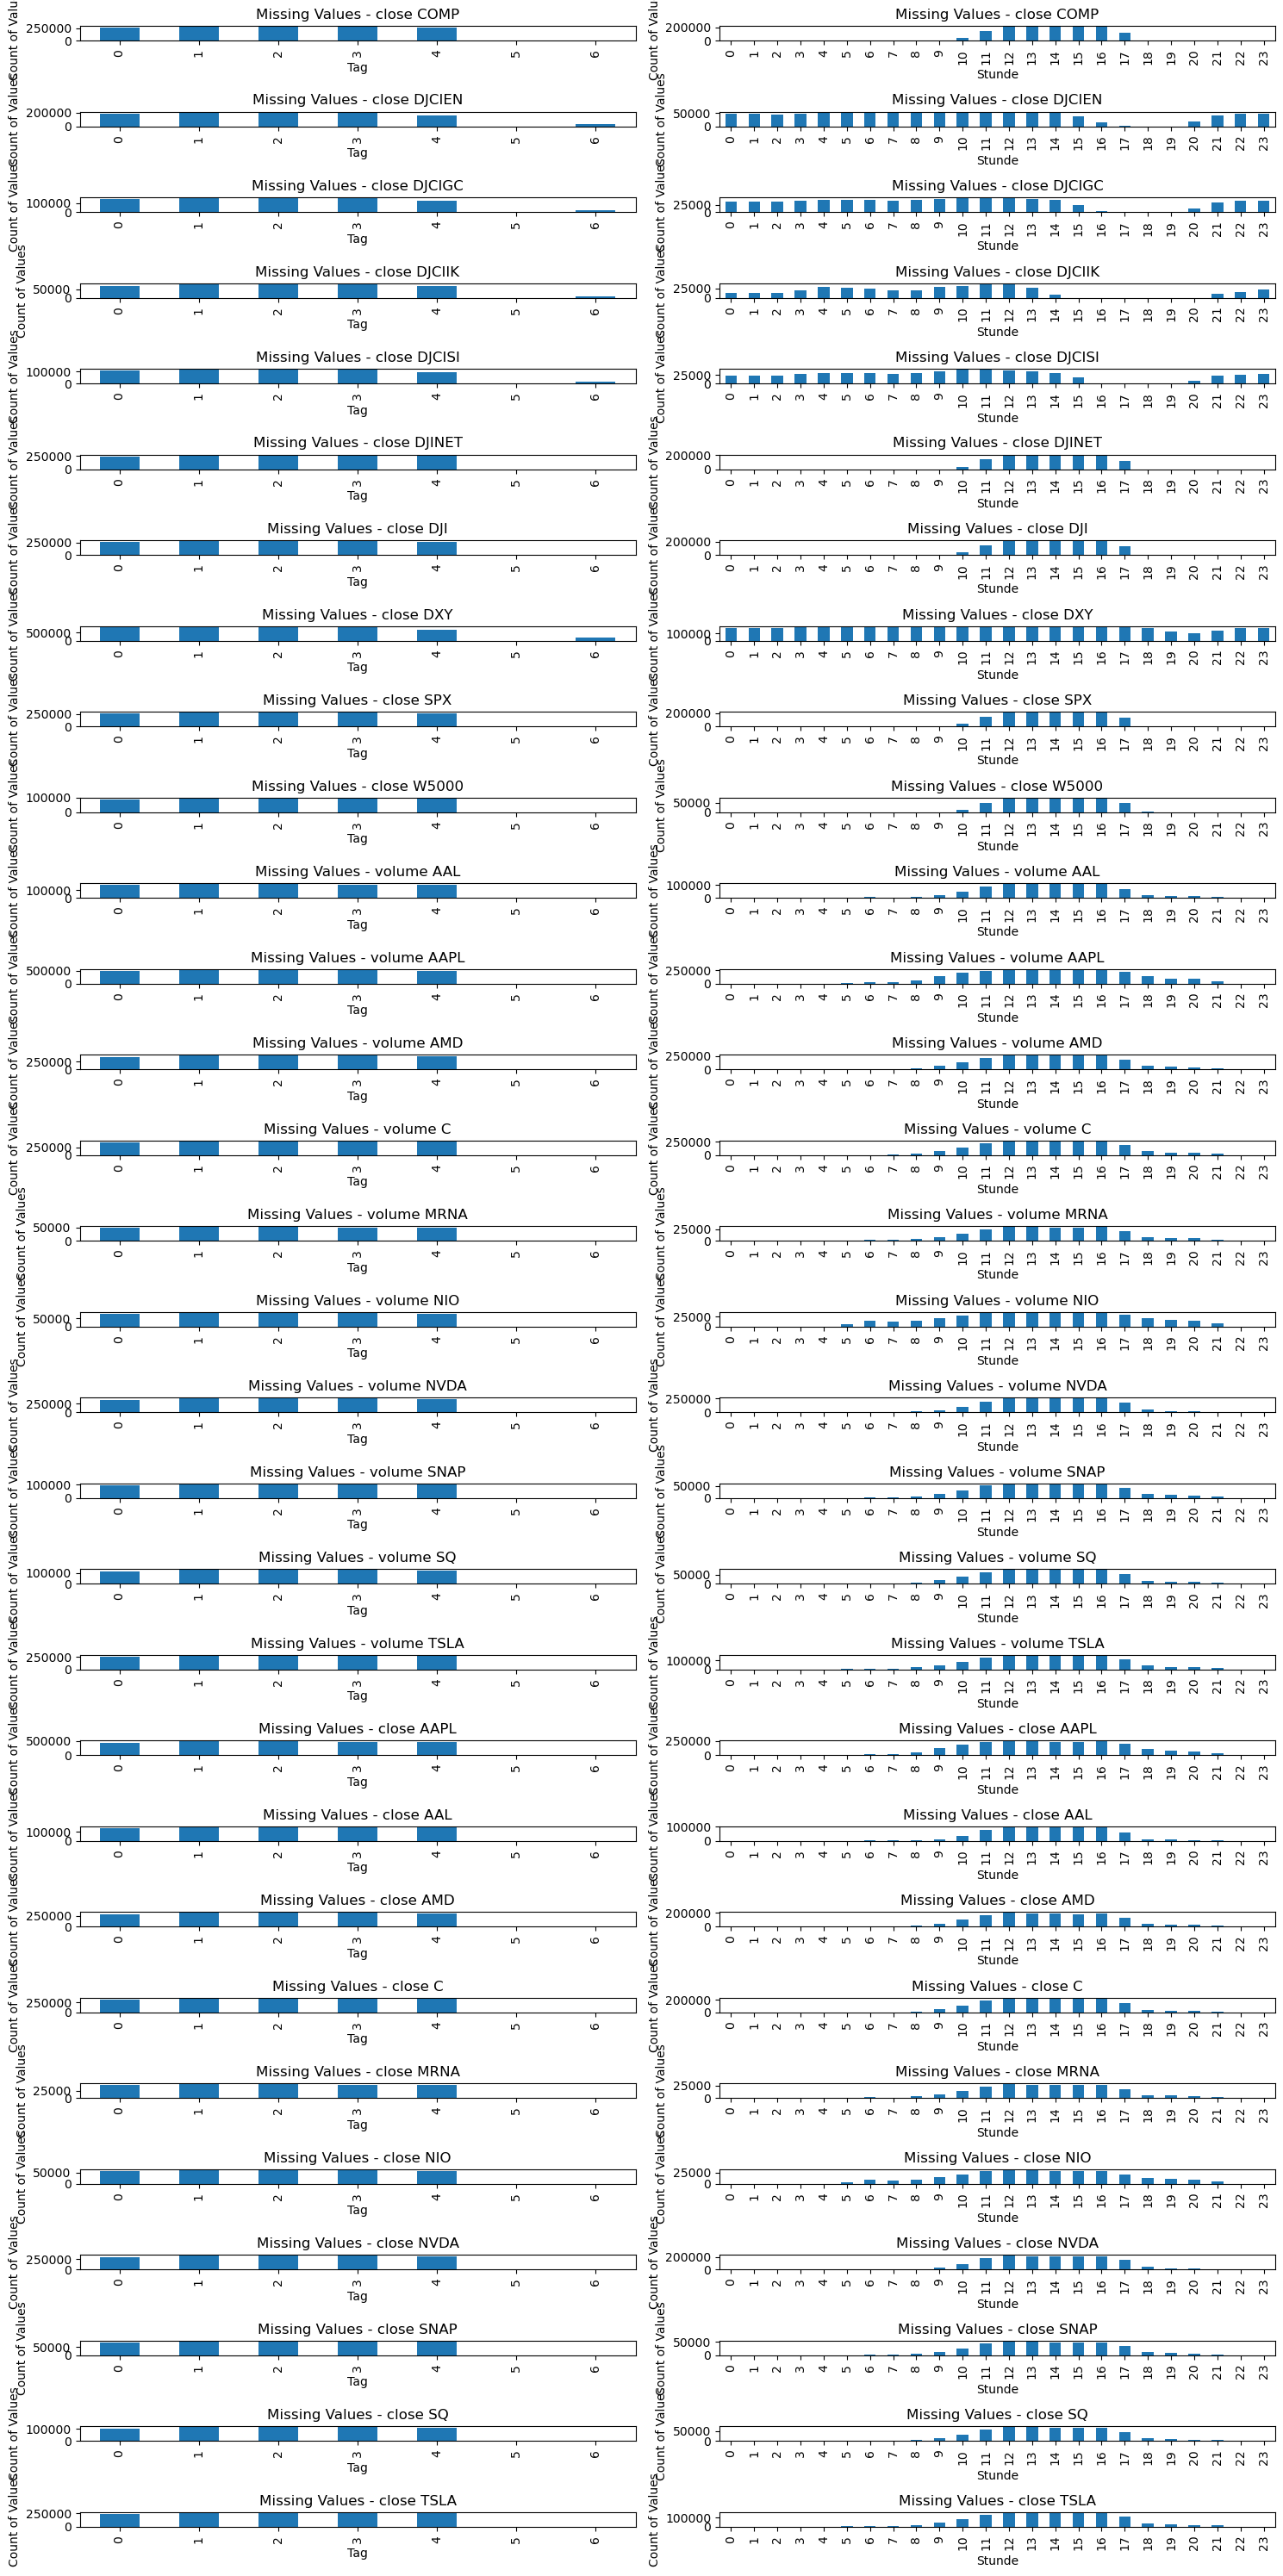

In [7]:
# Assuming the relevant columns are from the second column to "close TSLA"
columns_to_plot = df.drop(['posix_time', 'timestamp', 'last of day', 'first of day'], axis=1).columns

# Plot histograms for missing values based on "Tag"
plt.figure(figsize=(15, 30))
n_col = len(columns_to_plot)
i = 1
for column in columns_to_plot:
    plt.subplot(n_col, 2, i)
    (df[column] != 0).groupby(df['timestamp'].dt.weekday).sum().plot(kind='bar', title=f'Missing Values - {column}')
    plt.xlabel('Tag')
    plt.ylabel('Count of Values')
    i += 1

    plt.subplot(n_col, 2, i)
    (df[column] != 0).groupby(df['timestamp'].dt.hour).sum().plot(kind='bar', title=f'Missing Values - {column}')
    plt.xlabel('Stunde')
    plt.ylabel('Count of Values')
    i += 1

plt.tight_layout()
plt.show()

In [8]:
df = df.loc[(df['timestamp'].dt.hour >= 10)&(df['timestamp'].dt.hour <= 18)]

In [9]:
df.describe()

,posix_time,close COMP,close DJCIEN,close DJCIGC,close DJCIIK,close DJCISI,close DJINET,close DJI,close DXY,close SPX,close W5000,volume AAL,volume AAPL,volume AMD,volume C,volume MRNA,volume NIO,volume NVDA,volume SNAP,volume SQ,volume TSLA,first of day,last of day,close AAPL,close AAL,close AMD,close C,close MRNA,close NIO,close NVDA,close SNAP,close SQ,close TSLA
count,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06,2.343900e+06
mean,1.350196e+09,1.107899e-06,-1.698810e-07,3.784986e-08,2.233371e-07,5.637117e-08,1.069228e-06,4.594751e-07,-6.531554e-08,4.877352e-07,2.954024e-07,1.222413e+04,8.127434e+05,5.715125e+04,3.913541e+04,1.849199e+03,1.524119e+04,2.447777e+04,1.044607e+04,4.737030e+03,2.891391e+04,3.118734e-04,1.066598e-05,9.748012e-07,-5.650230e-07,-9.574217e-07,-1.558652e-06,-4.564368e-07,-2.503781e-08,8.916440e-07,-1.786346e-07,4.881873e-07,9.855289e-07
std,1.513811e+08,1.001071e-03,3.354866e-04,1.177607e-04,2.399135e-04,2.275964e-04,5.419104e-04,4.445630e-04,1.413973e-04,4.333007e-04,2.469507e-04,7.263010e+04,1.566823e+06,1.544592e+05,1.230163e+05,2.233006e+04,1.085308e+05,5.003444e+04,6.256672e+04,2.542106e+04,9.000746e+04,1.765719e-02,3.265865e-03,1.134279e-03,8.732437e-04,1.984439e-03,1.611379e-03,8.812581e-04,1.052329e-03,1.608847e-03,8.265266e-04,8.543181e-04,1.280089e-03
min,1.073034e+09,-5.516304e-01,-4.676176e-02,-8.262434e-03,-2.111480e-02,-2.369350e-02,-7.508147e-02,-9.706275e-02,-1.292542e-02,-8.135314e-02,-6.605604e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.294316e-01,-9.548229e-02,-1.629213e-01,-2.838651e-01,-9.776335e-02,-6.841463e-02,-2.434617e-01,-1.552849e-01,-1.111111e-01,-2.458418e-01
25%,1.223656e+09,-3.249428e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.762510e-05,-3.151760e-05,-3.754987e-05,-2.842411e-05,0.000000e+00,0.000000e+00,4.774800e+04,1.100000e+03,7.500000e+02,0.000000e+00,0.000000e+00,3.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.661750e-04,0.000000e+00,-4.122012e-04,-2.202665e-04,0.000000e+00,0.000000e+00,-3.273534e-04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.354785e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.828000e+05,1.510000e+04,1.127500e+04,0.000000e+00,0.000000e+00,1.040000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.479296e+09,4.022958e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.053727e-05,3.491240e-05,3.755210e-05,3.278867e-05,0.000000e+00,4.933000e+03,9.464000e+05,6.181200e+04,3.795000e+04,0.000000e+00,0.000000e+00,2.952700e+04,0.000000e+00,0.000000e+00,2.692500e+04,0.000000e+00,0.000000e+00,2.704941e-04,0.000000e+00,4.156461e-04,2.189039e-04,0.000000e+00,0.000000e+00,3.284742e-04,0.000000e+00,0.000000e+00,0.000000e+00
max,1.609438e+09,1.237102e+00,6.046296e-02,7.346151e-03,2.624177e-02,1.385873e-02,5.558825e-02,6.052465e-02,1.080033e-02,5.707398e-02,5.315099e-02,5.230569e+07,2.272700e+08,1.174854e+08,4.646574e+07,1.365456e+07,4.997037e+07,9.372717e+06,3.075694e+07,9.023475e+06,7.003038e+07,1.000000e+00,1.000000e+00,2.977433e-01,8.003780e-02,1.918605e-01,4.033029e-01,1.245436e-01,7.623762e-02,1.269229e-01,2.260808e-01,7.552581e-02,3.259311e-01


In [56]:
quantiles = df.quantile(q=0.99995, axis=0)
df_clipped = df.clip(upper=quantiles*2, axis=1)

In [50]:
quantiles[9]

2204621.3485008245

In [51]:
#df = df.drop(['posix_time', 'timestamp', 'last of day', 'first of day'], axis=1)
df = df.drop([c for c in df.columns if 'close' in c], axis=1)

IndexError: single positional indexer is out-of-bounds

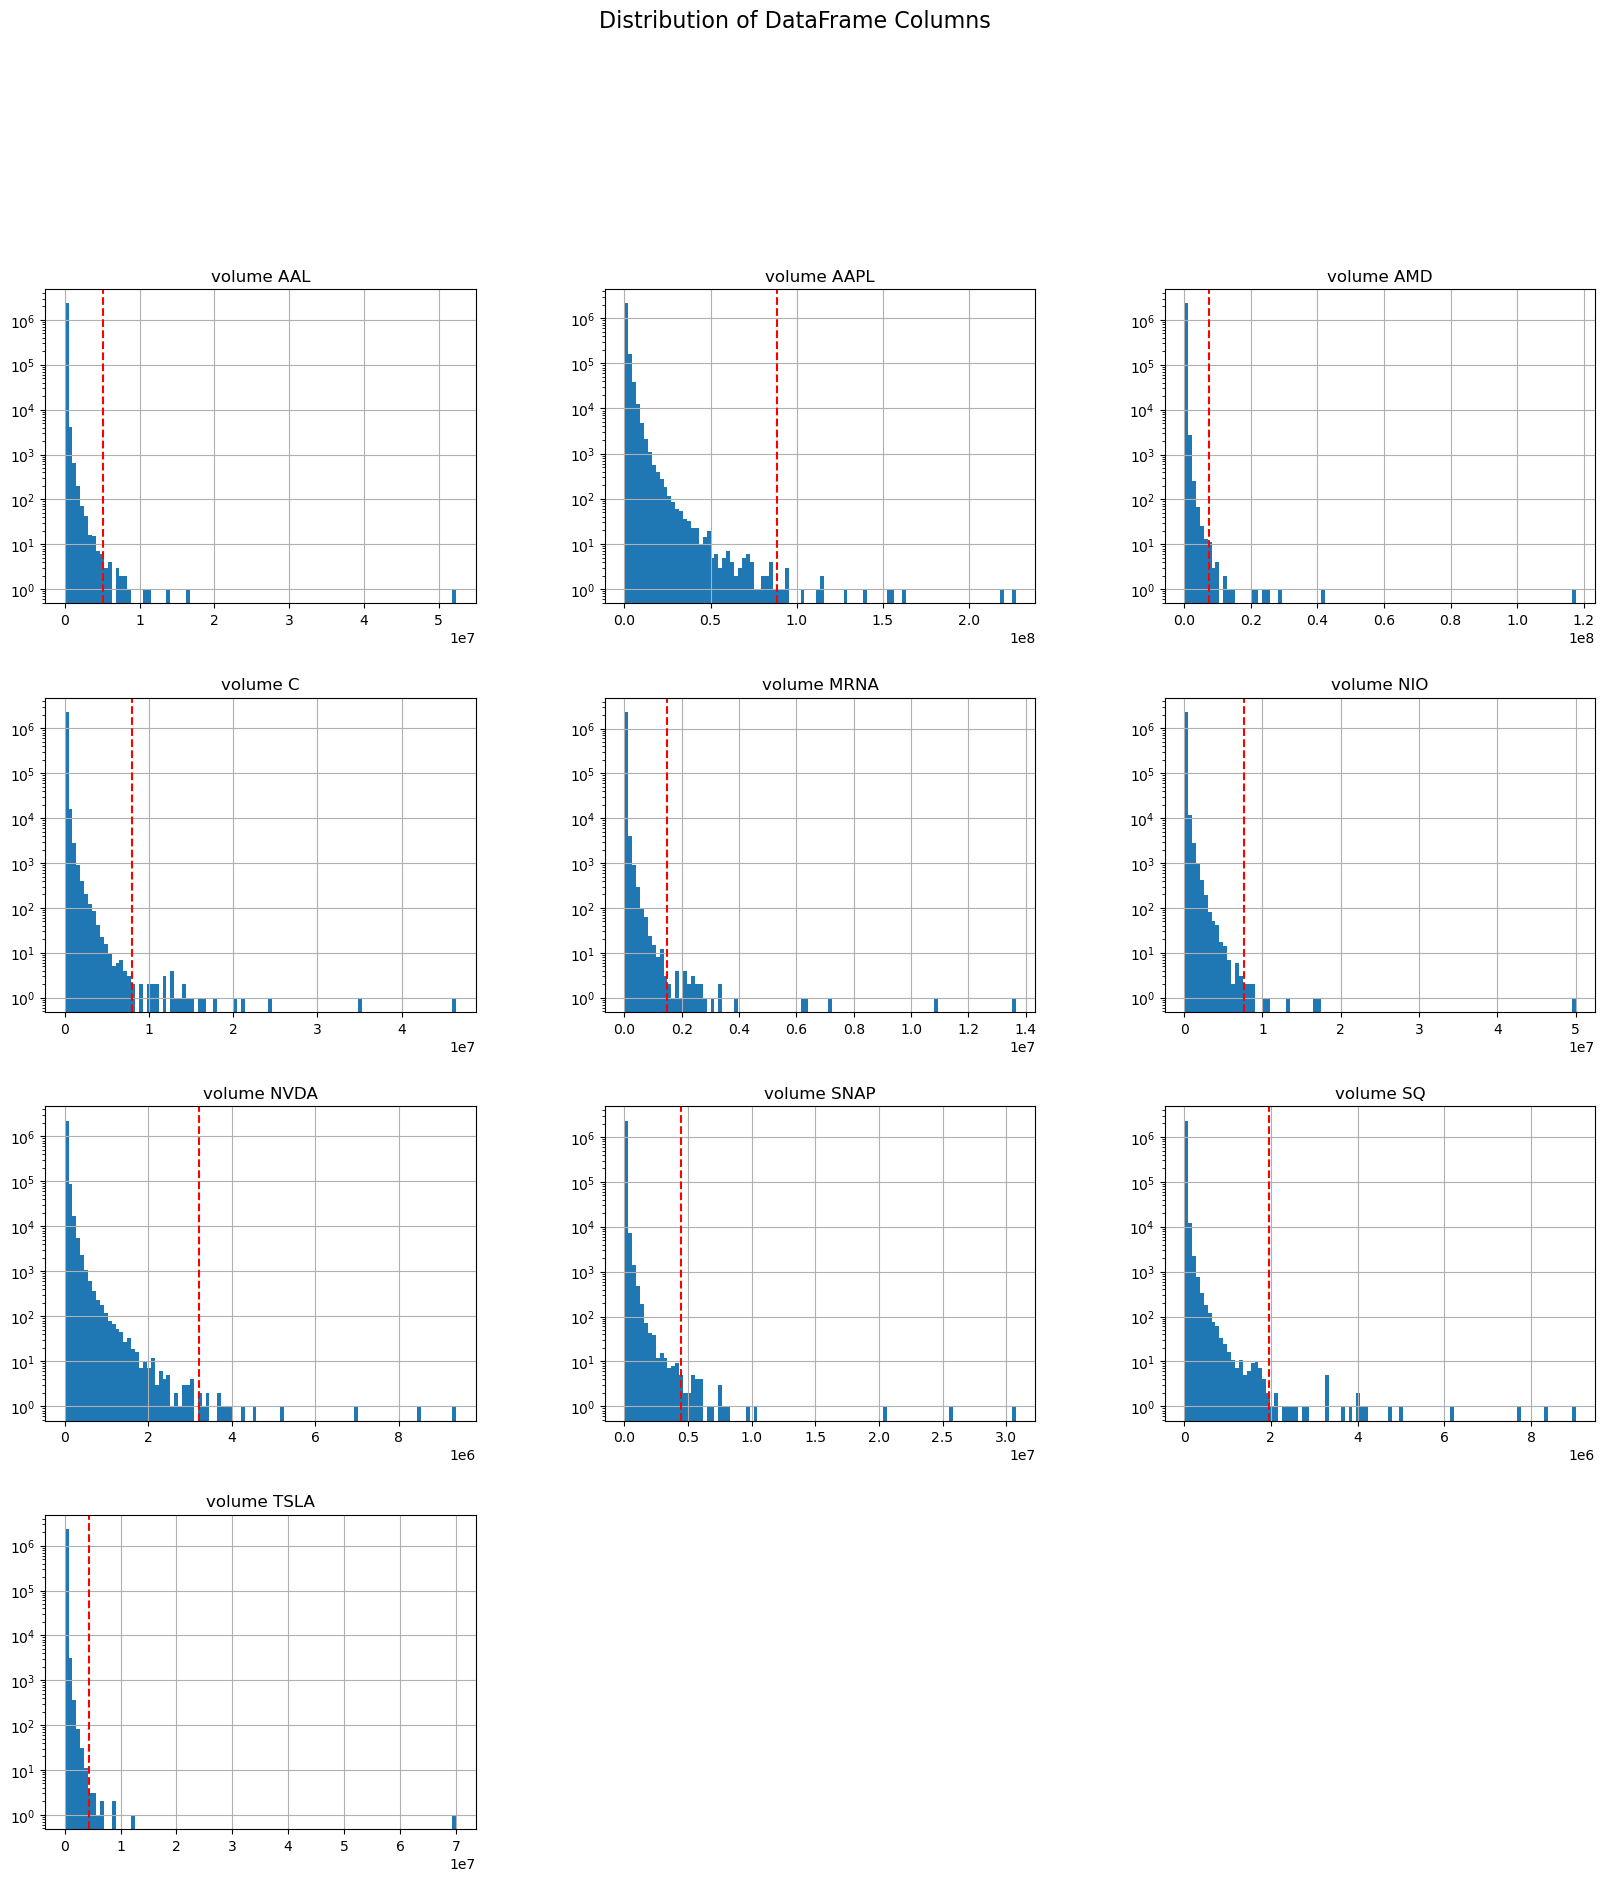

In [52]:
# Plot the distribution of all columns
h_plot = df.hist(bins=100, figsize=(20, 20), log=True)  # You can adjust the number of bins and figsize as needed
plt.suptitle('Distribution of DataFrame Columns', x=0.5, y=1.02, fontsize=16)
i = 0
for row in h_plot:
    for col_plot in row:
        col_plot.axvline(x=(quantiles.iloc[i]*2), color='red', linestyle='--')
        i += 1
plt.show()

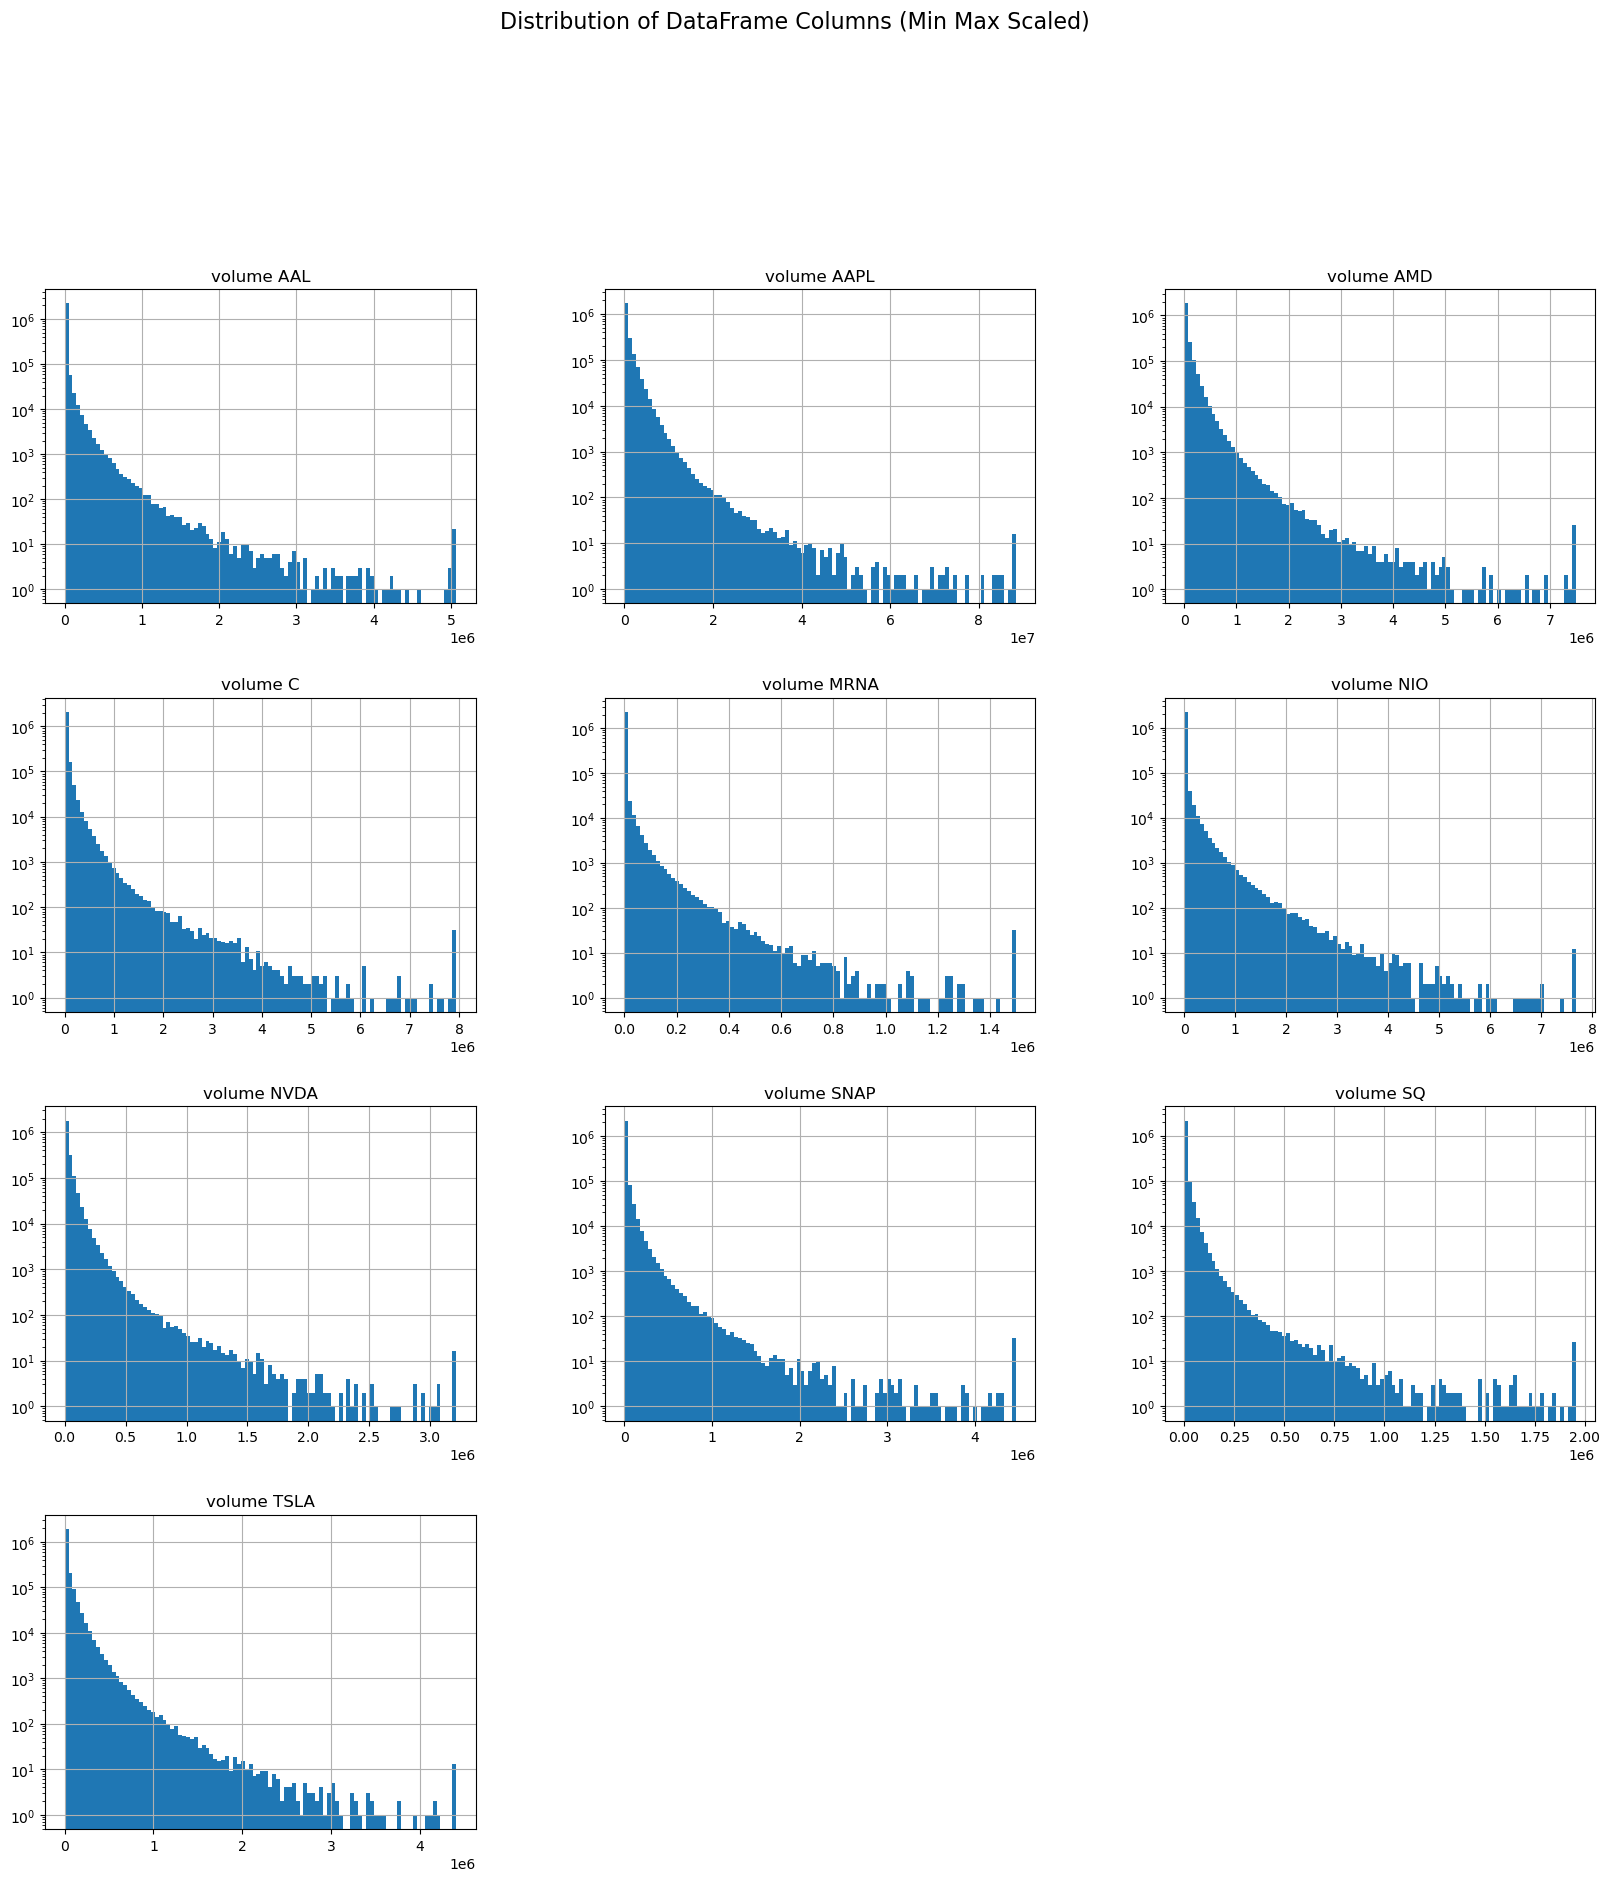

In [57]:
df_clipped.hist(bins=100, figsize=(20, 20), log=True)  # You can adjust the number of bins and figsize as needed
plt.suptitle('Distribution of DataFrame Columns (Min Max Scaled)', x=0.5, y=1.02, fontsize=16)
plt.show()

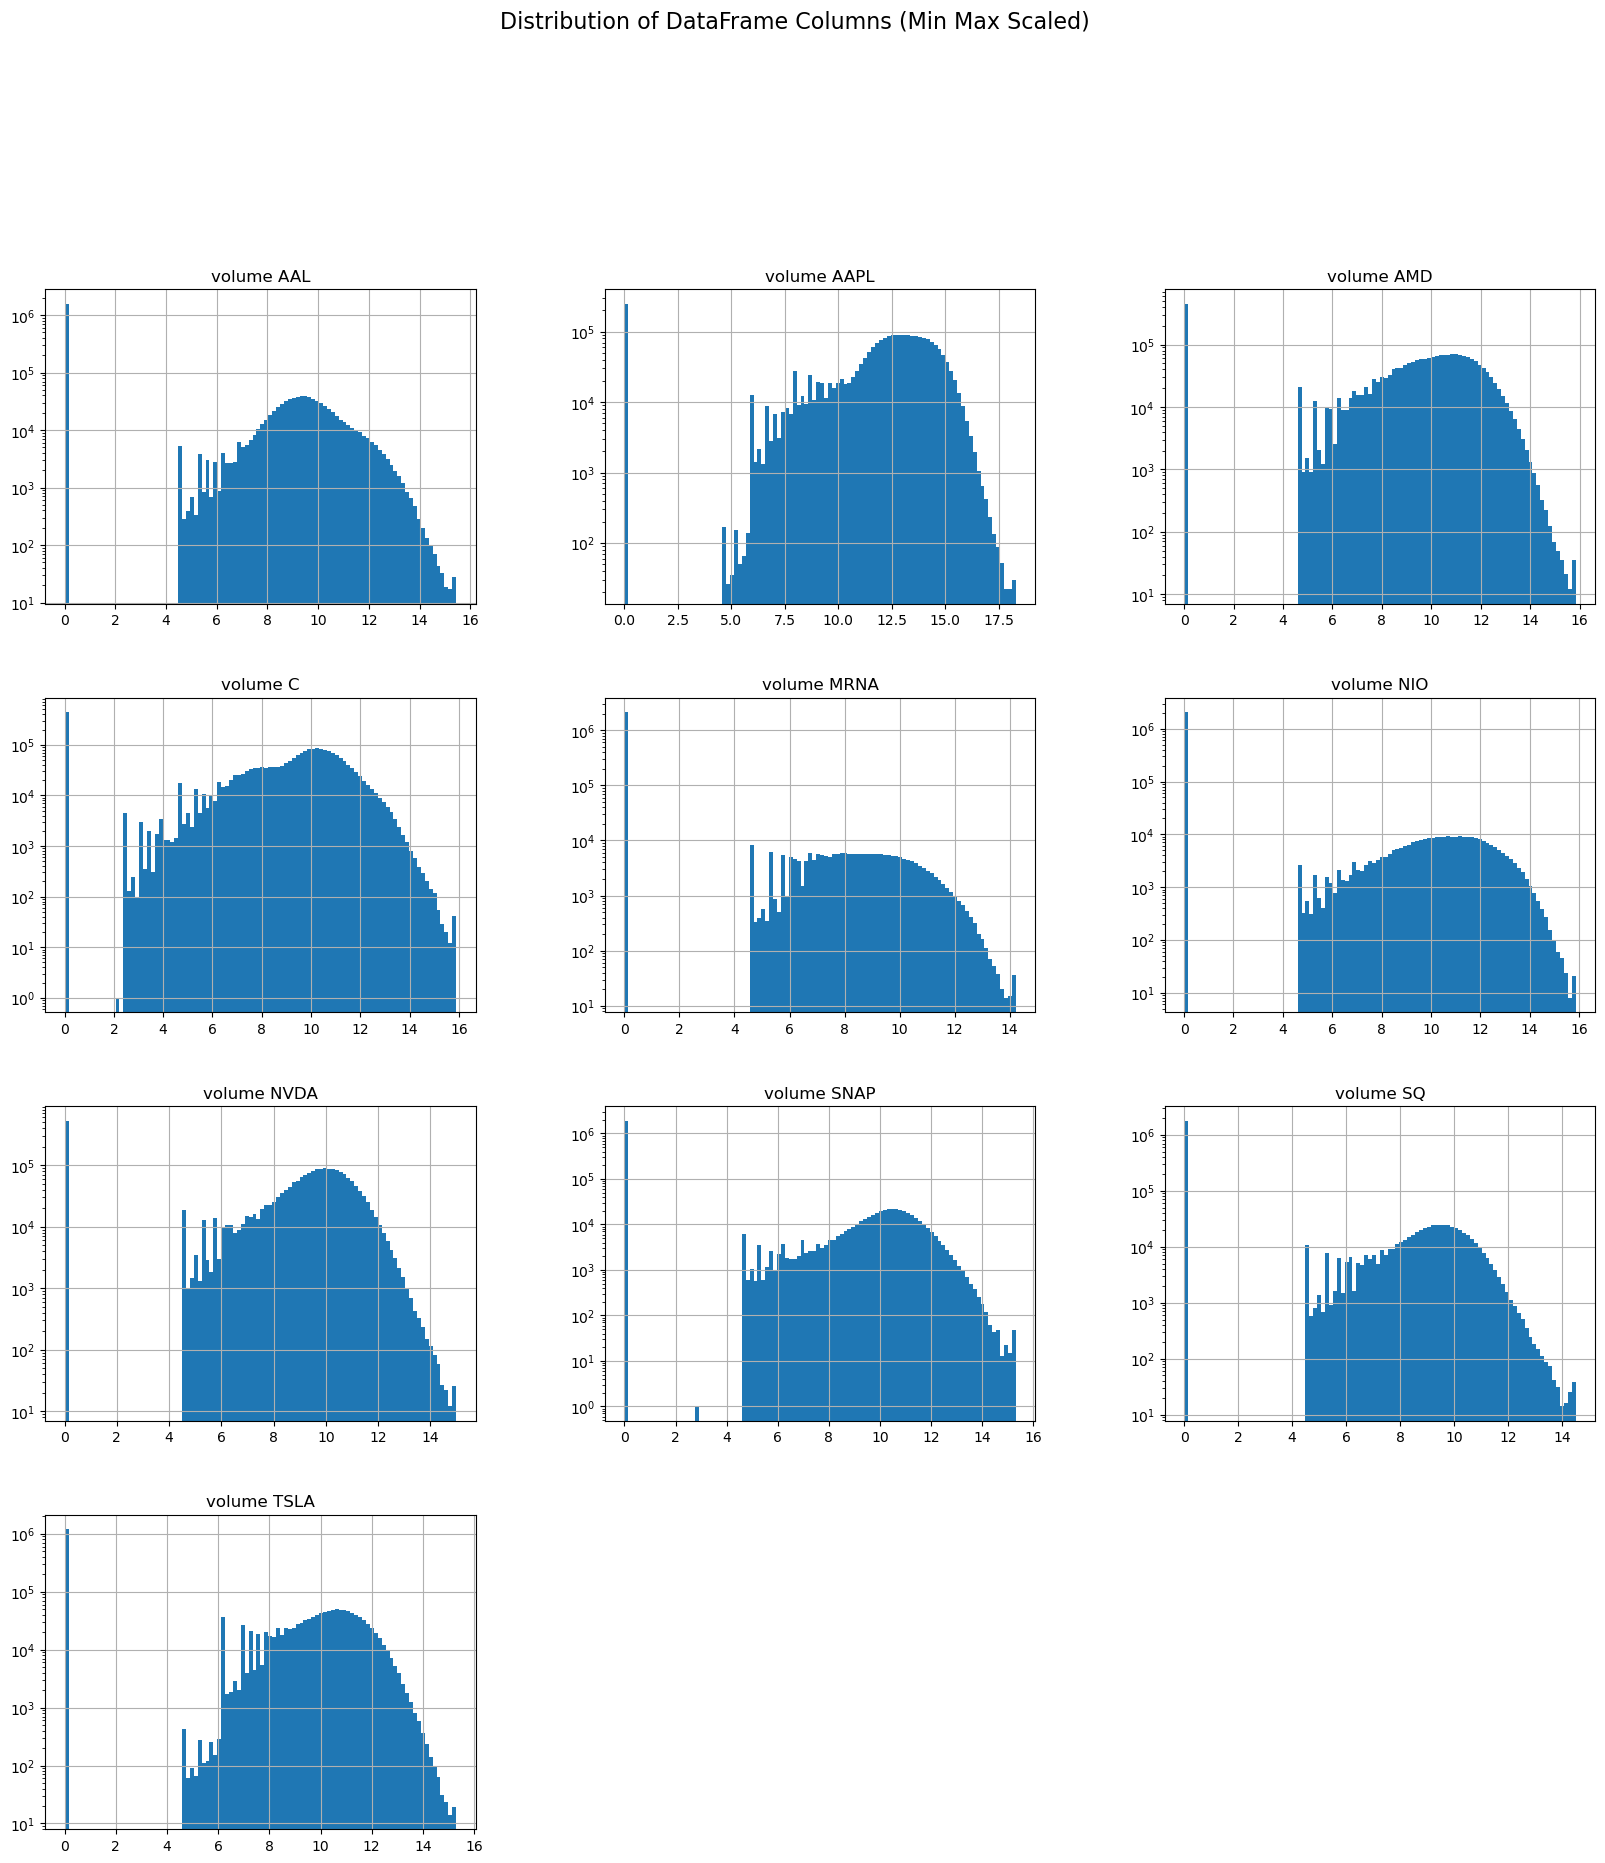

In [58]:
log_scaler = preprocessing.FunctionTransformer(np.log1p)
df_log = log_scaler.transform(df_clipped)
df_log = pd.DataFrame(df_log, columns=df.columns)

# Plot the distribution of all columns
df_log.hist(bins=100, figsize=(20, 20), log=True)  # You can adjust the number of bins and figsize as needed
plt.suptitle('Distribution of DataFrame Columns (Min Max Scaled)', x=0.5, y=1.02, fontsize=16)
plt.show()

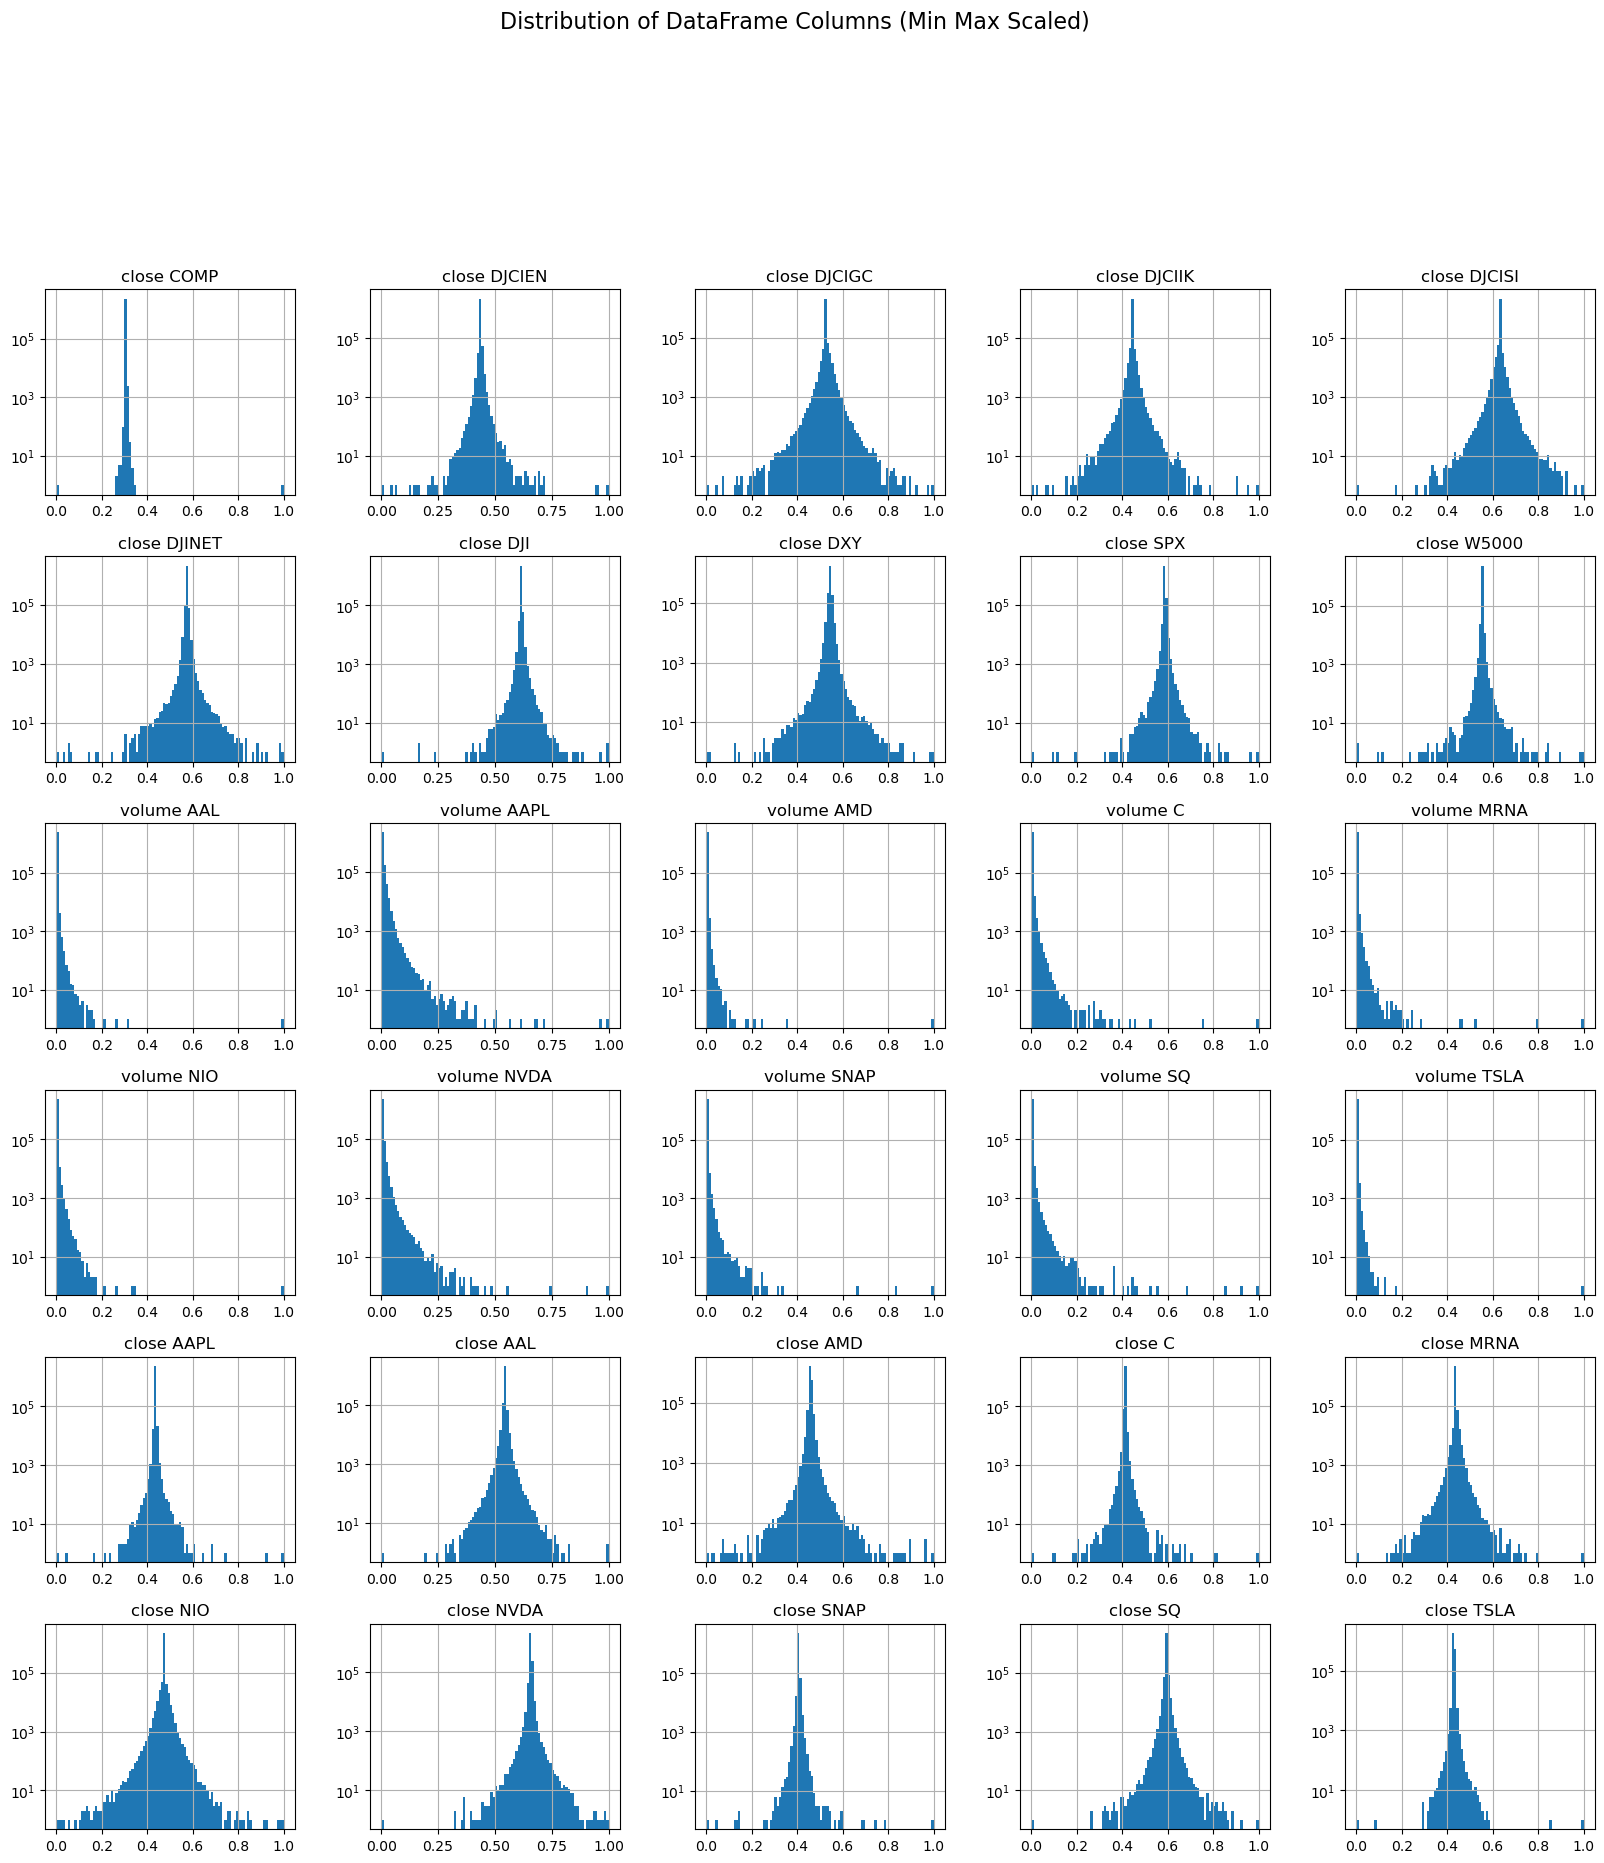

In [12]:
mm_scaler = preprocessing.MinMaxScaler().fit(df)
df_mm = mm_scaler.transform(df)
df_mm = pd.DataFrame(df_mm, columns=df.columns)

# Plot the distribution of all columns
df_mm.hist(bins=100, figsize=(20, 20), log=True)  # You can adjust the number of bins and figsize as needed
plt.suptitle('Distribution of DataFrame Columns (Min Max Scaled)', x=0.5, y=1.02, fontsize=16)
plt.show()

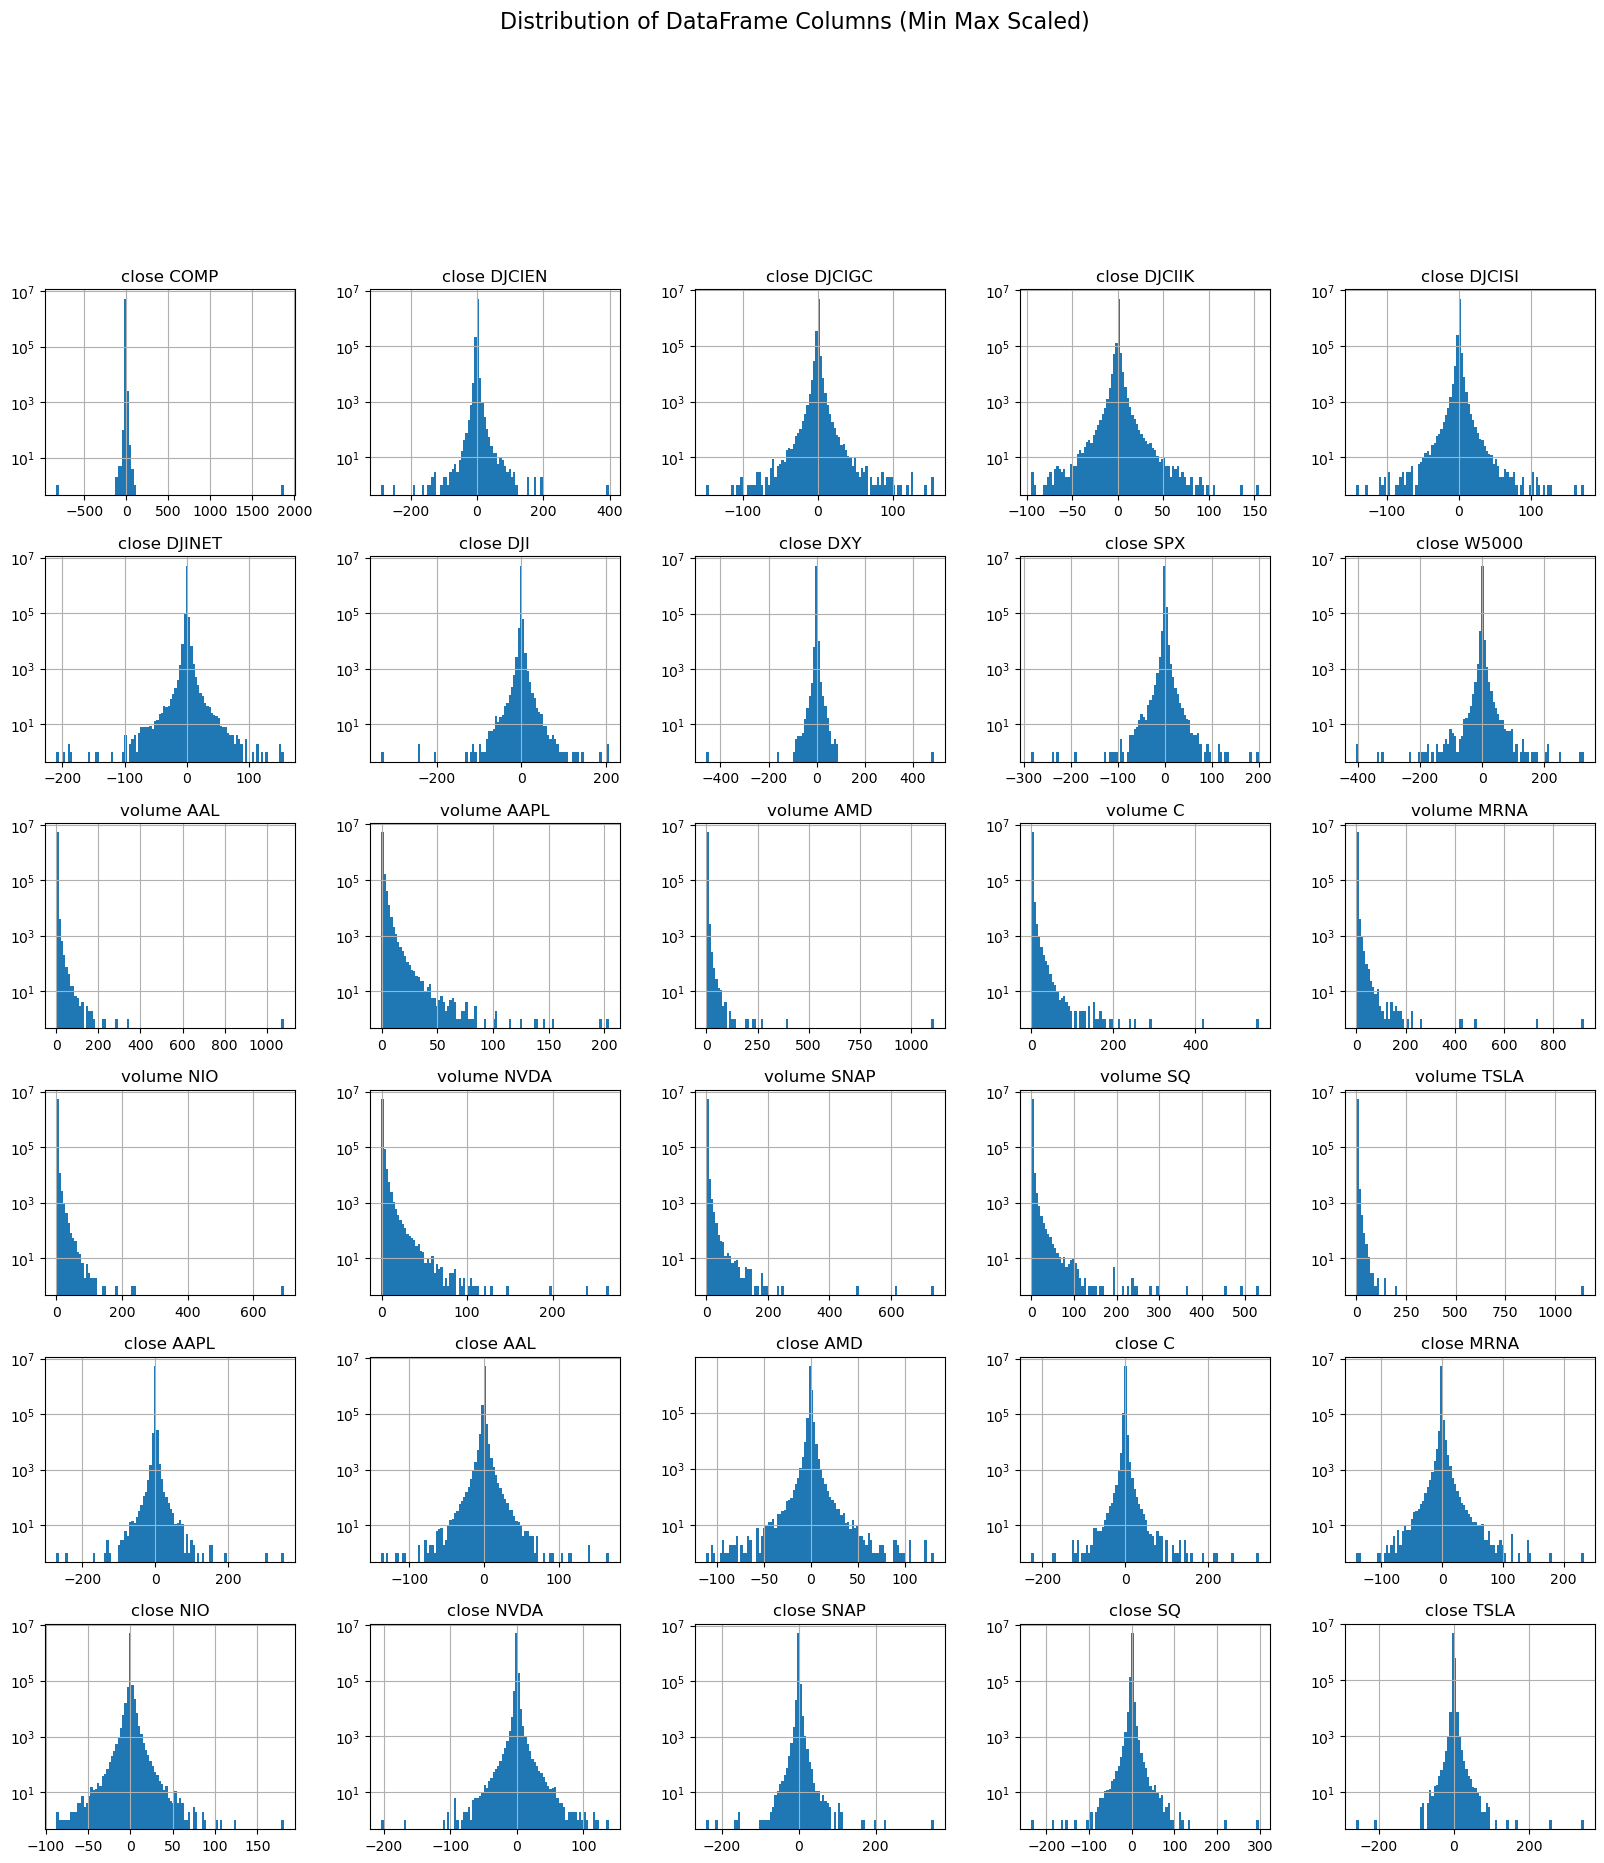

In [29]:
sd_scaler = preprocessing.StandardScaler().fit(df)
df_sd = sd_scaler.transform(df)
df_sd = pd.DataFrame(df_sd, columns=df.columns)

# Plot the distribution of all columns
df_sd.hist(bins=100, figsize=(20, 20), log=True)  # You can adjust the number of bins and figsize as needed
plt.suptitle('Distribution of DataFrame Columns (Min Max Scaled)', x=0.5, y=1.02, fontsize=16)
plt.show()

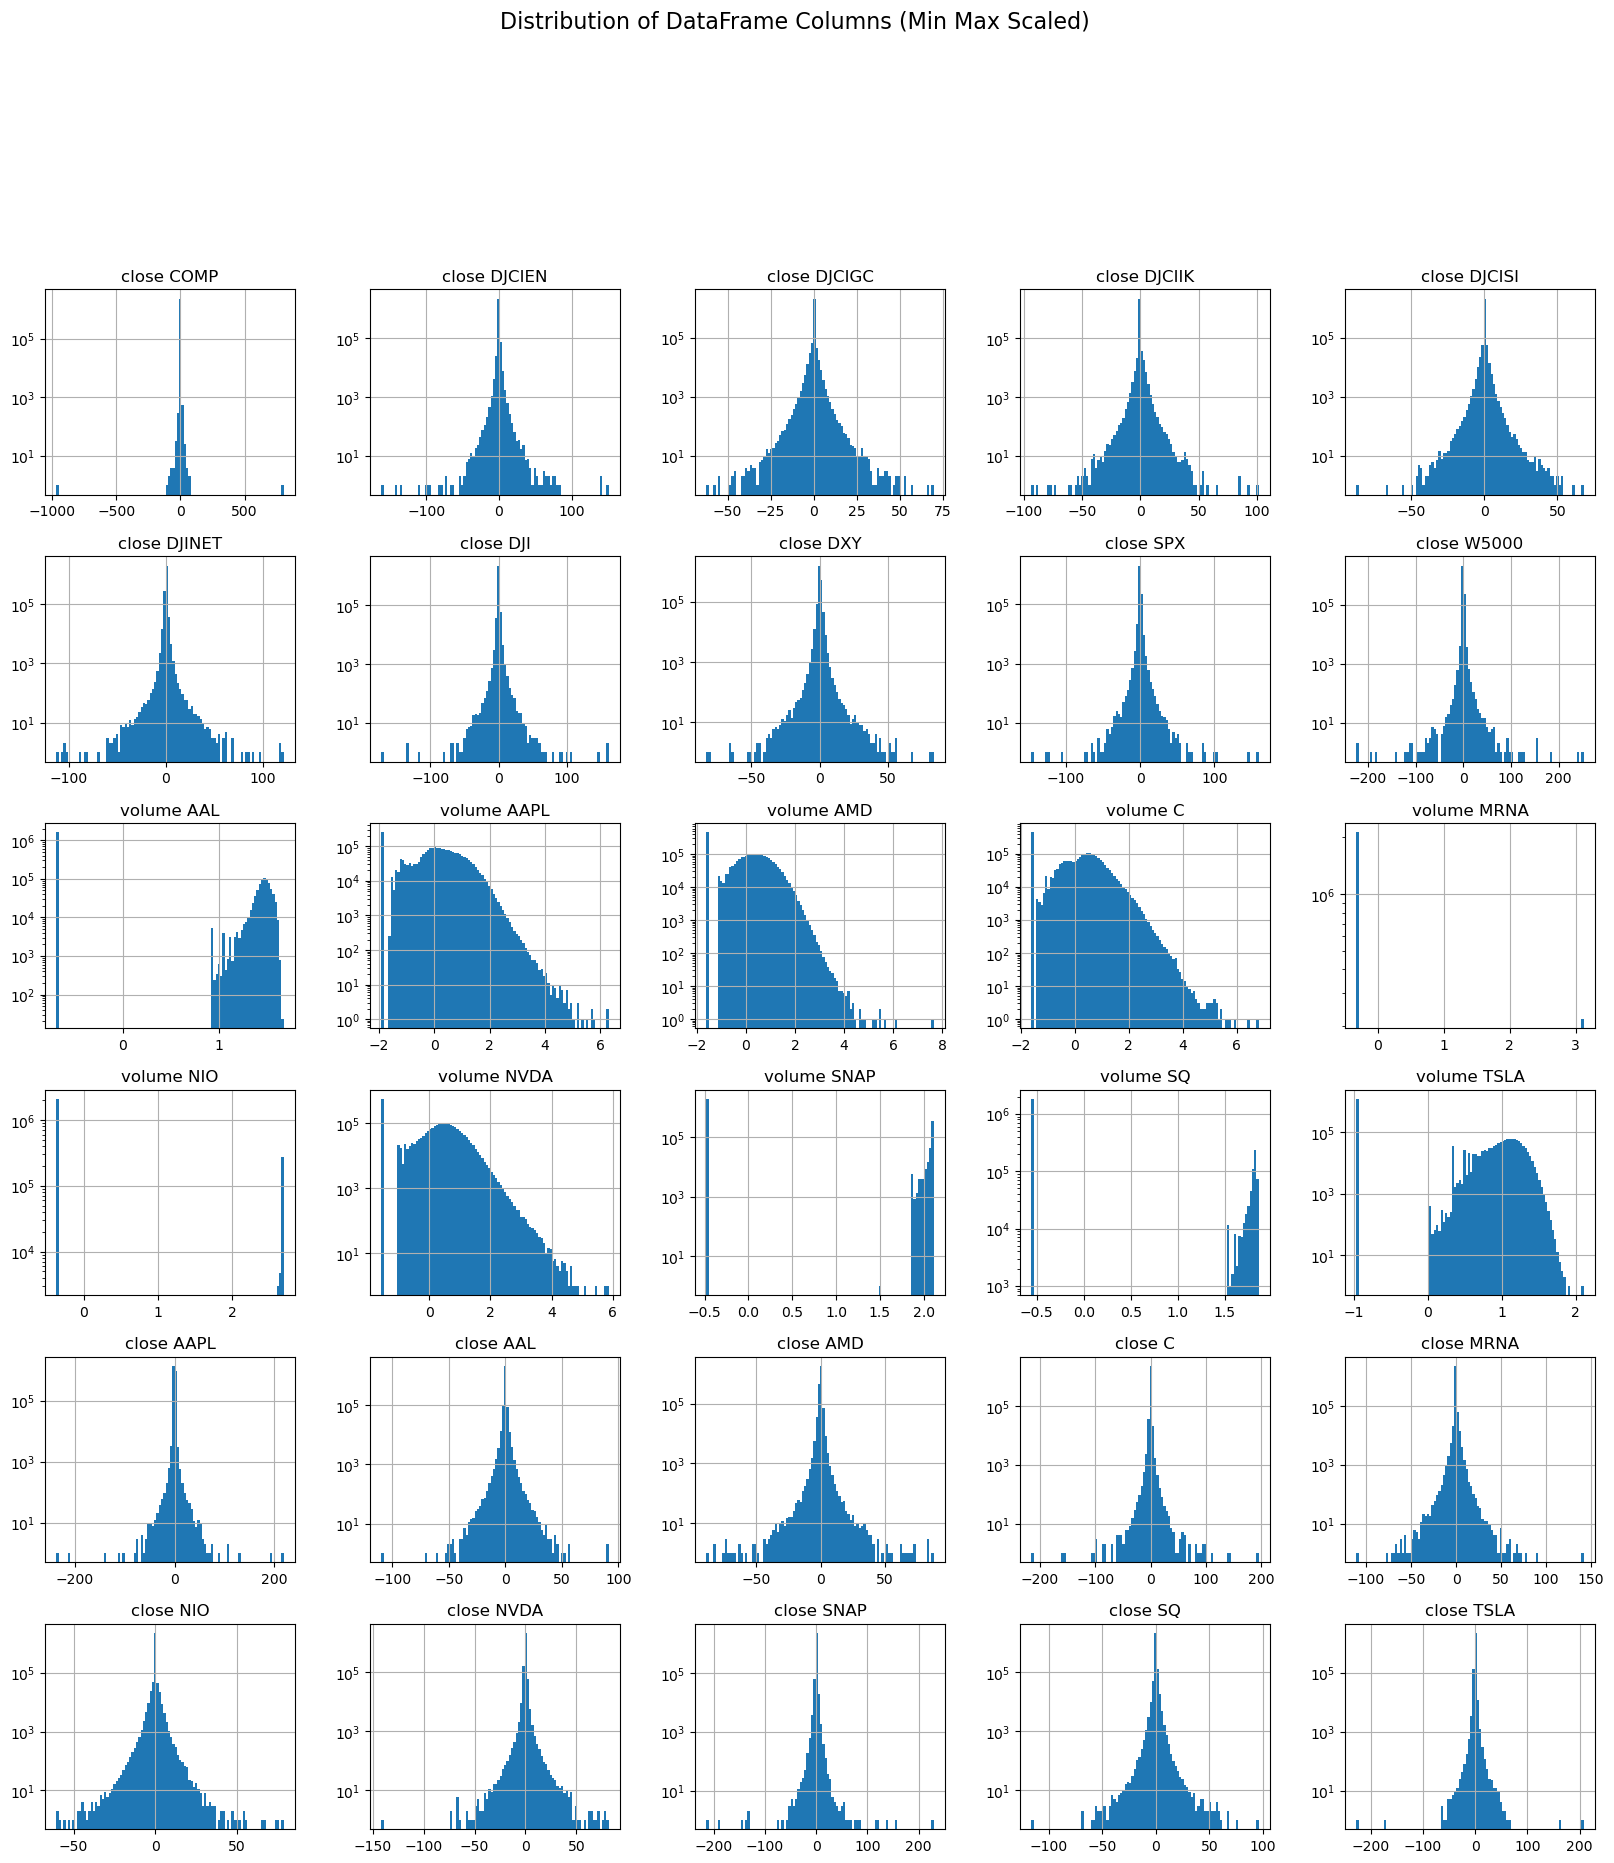

In [14]:
pt_scaler = preprocessing.PowerTransformer().fit(df)
df_pt = pt_scaler.transform(df)
df_pt = pd.DataFrame(df_pt, columns=df.columns)

# Plot the distribution of all columns
df_pt.hist(bins=100, figsize=(20, 20), log=True)  # You can adjust the number of bins and figsize as needed
plt.suptitle('Distribution of DataFrame Columns (Min Max Scaled)', x=0.5, y=1.02, fontsize=16)
plt.show()

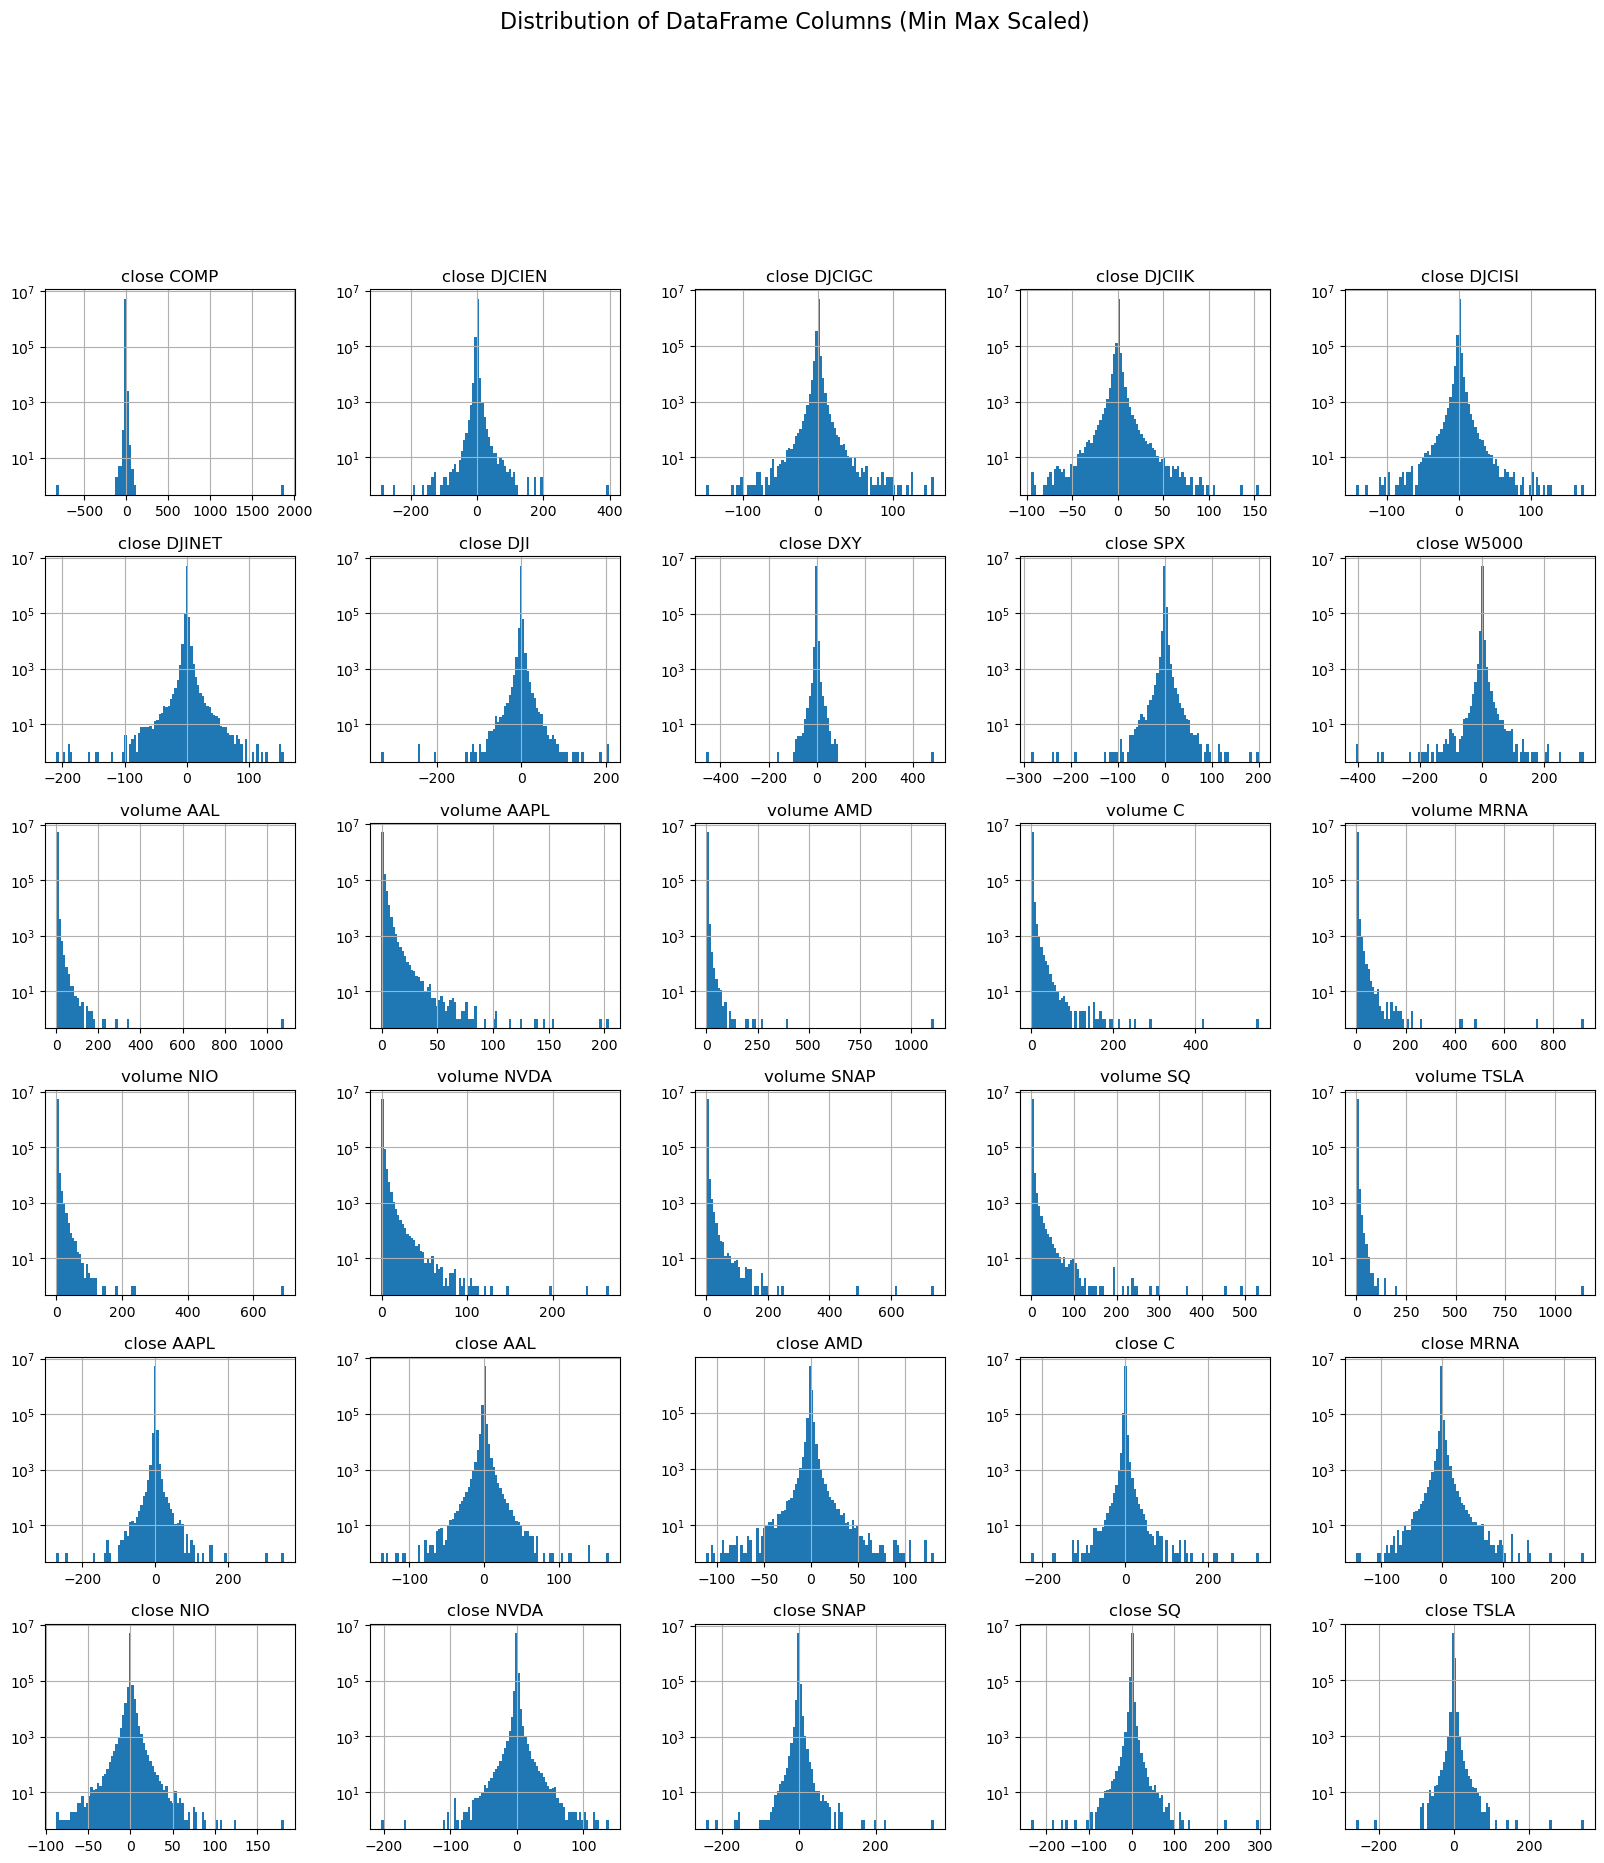

In [33]:
qnorm_scaler = preprocessing.QuantileTransformer().fit(df)
df_qunif = sd_scaler.transform(df)
df_qunif = pd.DataFrame(df_qunif, columns=df.columns)

# Plot the distribution of all columns
df_qunif.hist(bins=100, figsize=(20, 20), log=True)  # You can adjust the number of bins and figsize as needed
plt.suptitle('Distribution of DataFrame Columns (Min Max Scaled)', x=0.5, y=1.02, fontsize=16)
plt.show()

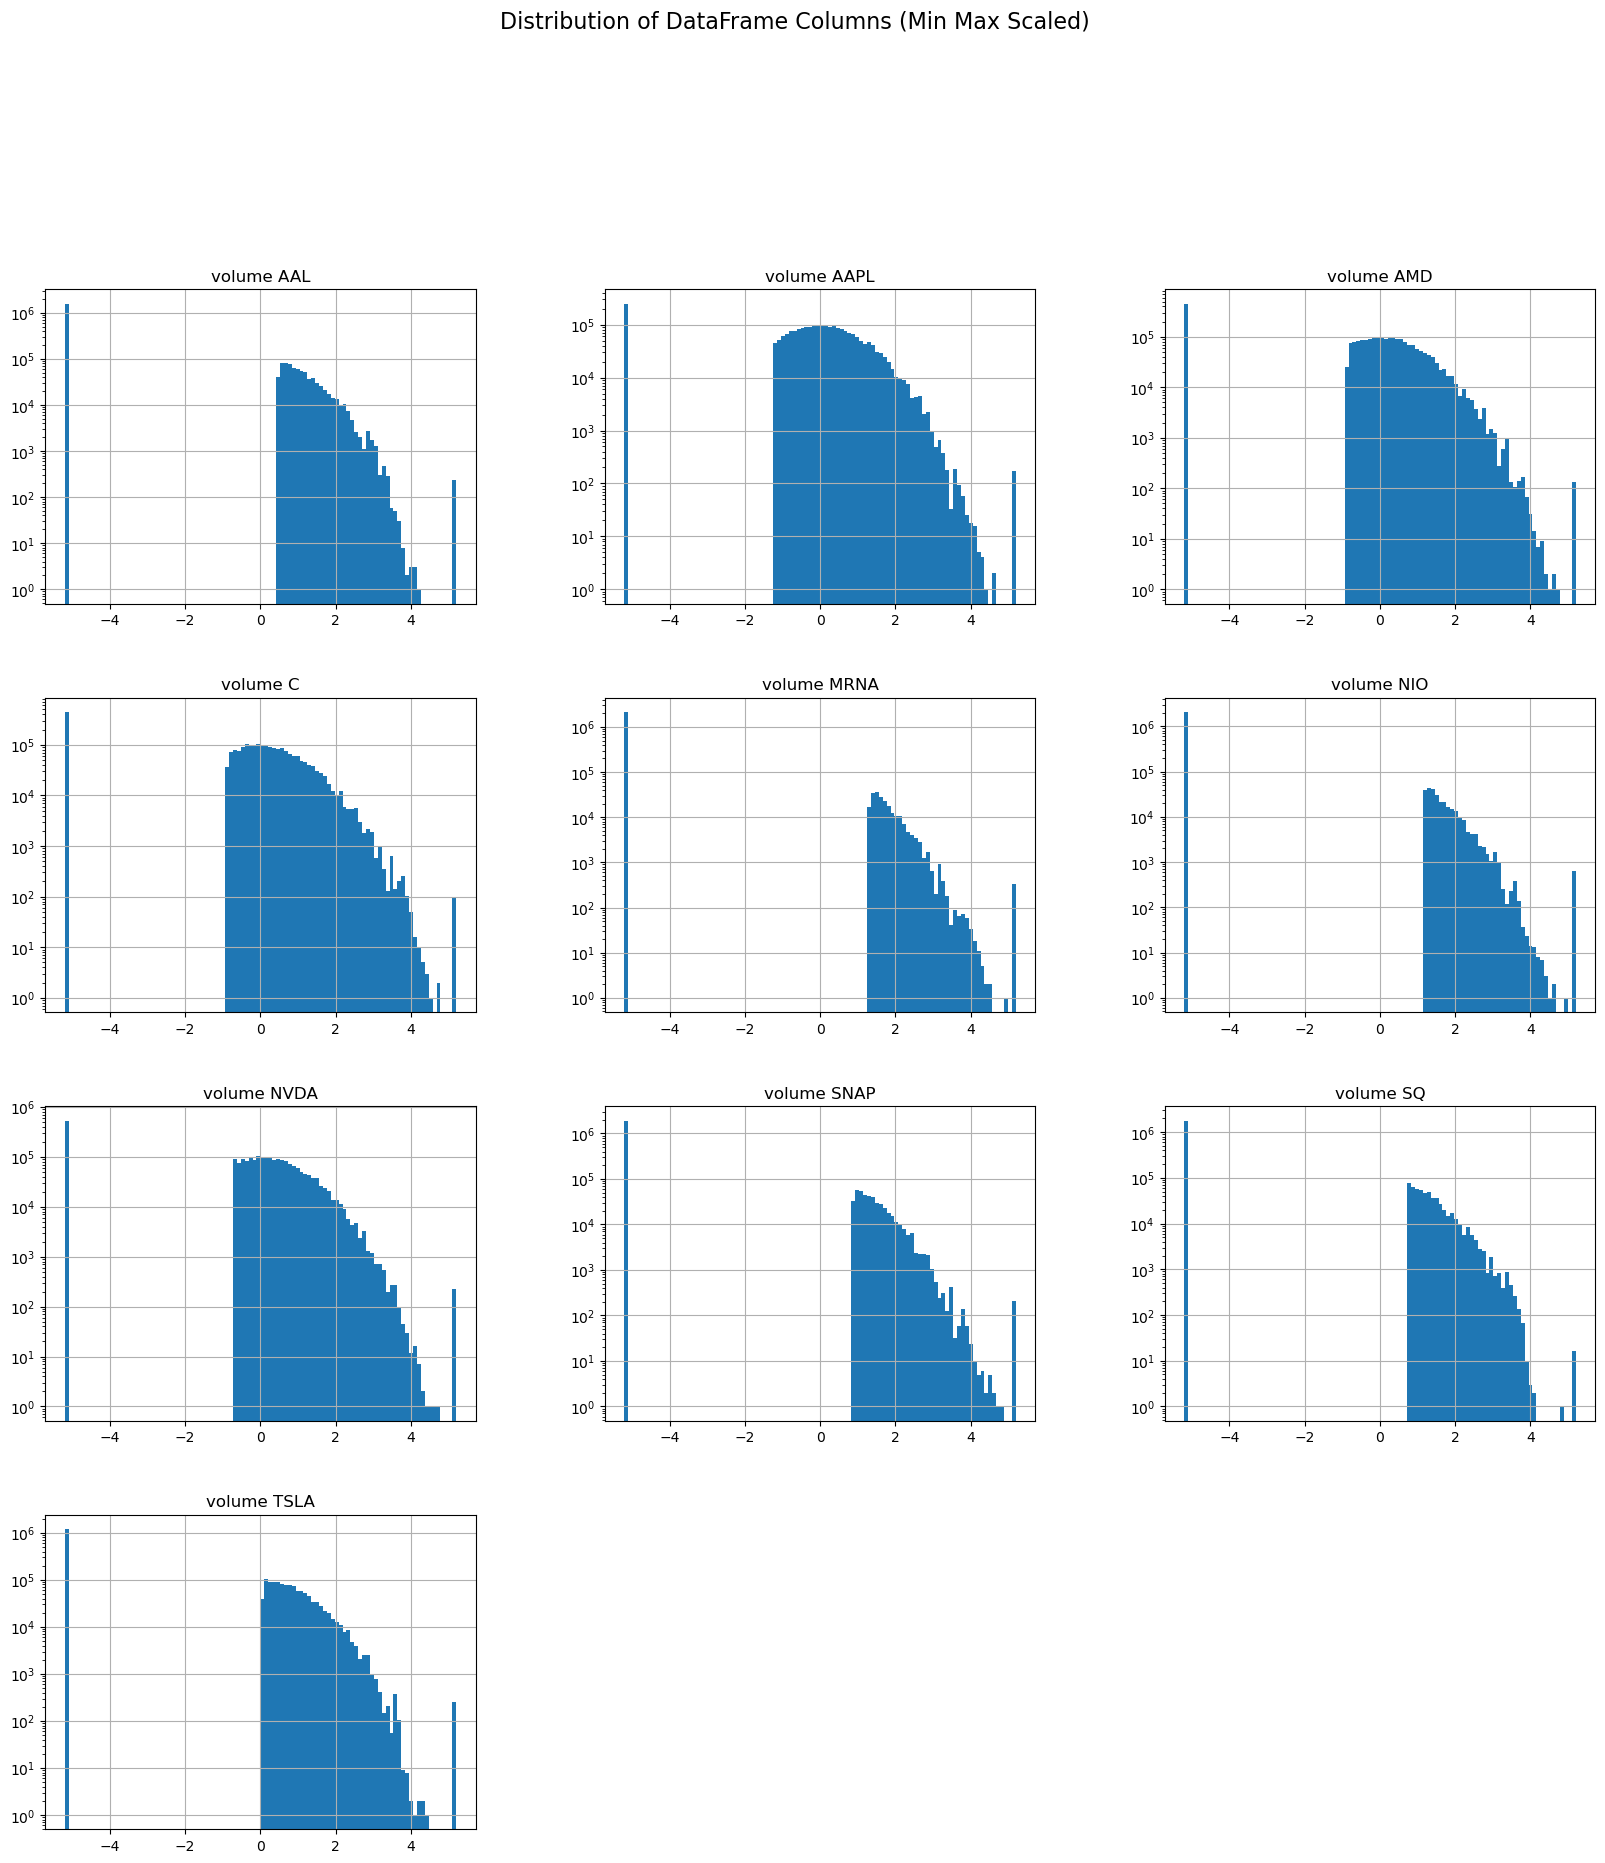

In [53]:
qnorm_scaler = preprocessing.QuantileTransformer(output_distribution='normal', n_quantiles=10000).fit(df)
df_qnorm = qnorm_scaler.transform(df)
df_qnorm = pd.DataFrame(df_qnorm, columns=df.columns)

# Plot the distribution of all columns
df_qnorm.hist(bins=100, figsize=(20, 20), log=True)  # You can adjust the number of bins and figsize as needed
plt.suptitle('Distribution of DataFrame Columns (Min Max Scaled)', x=0.5, y=1.02, fontsize=16)
plt.show()